In [5]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [40]:
import numpy as np
import pandas as pd
#df = pd.read_csv(car_data, header=None)

In [53]:
columns = ["buying",
"maint",
"doors",
"persons",
"lug_boot",
"safety",
"condition"]

In [81]:
df = pd.read_csv(car_data, names=columns, index_col=None )
df

,buying,maint,doors,persons,lug_boot,safety,condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [36]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [75]:
df

,buying,maint,doors,persons,lug_boot,safety,condition
0,3,3,2,2,small,0,unacc
1,3,3,2,2,small,1,unacc
2,3,3,2,2,small,2,unacc
3,3,3,2,2,med,0,unacc
4,3,3,2,2,med,1,unacc
...,...,...,...,...,...,...,...
1723,0,0,5more,more,med,1,good
1724,0,0,5more,more,med,2,vgood
1725,0,0,5more,more,big,0,unacc
1726,0,0,5more,more,big,1,good


In [82]:
# df.buying[df.buying=="low"]=0
# df.buying[df.buying=="med"]=1

rating = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3, 'small': 0, 'big': 2, 'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3, '2': 2, '3': 3, '4': 4, 'more': 5, '5more': 5}

df.buying = [rating[i] for i in df.buying]
df.maint = [rating[i] for i in df.maint]
df.safety = [rating[i] for i in df.safety]
df.persons = [rating[i] for i in df.persons]
df.doors = [rating[i] for i in df.doors]
df.condition = [rating[i] for i in df.condition]
df.lug_boot = [rating[i] for i in df.lug_boot]


In [83]:
df

,buying,maint,doors,persons,lug_boot,safety,condition
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [46]:
df["buying"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [48]:
df["persons"].unique()

array(['small', 'med', 'big'], dtype=object)

In [49]:
df["maint"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [52]:
df["doors"].unique()

array(['2', '4', 'more'], dtype=object)

In [50]:
df["lug_boot"].unique()

array(['low', 'med', 'high'], dtype=object)

In [51]:
df["safety"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [56]:
df["condition"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [84]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [85]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: condition, Length: 1728, dtype: int64

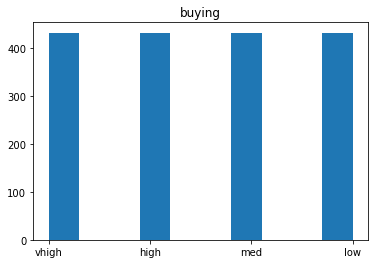

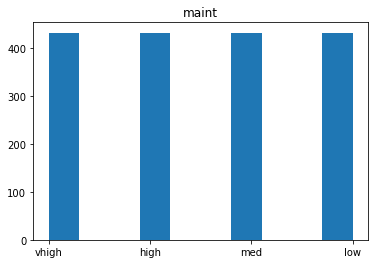

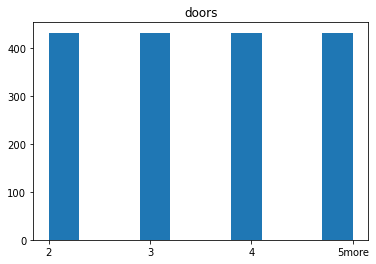

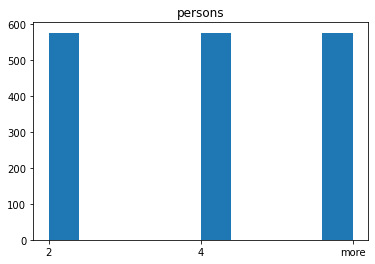

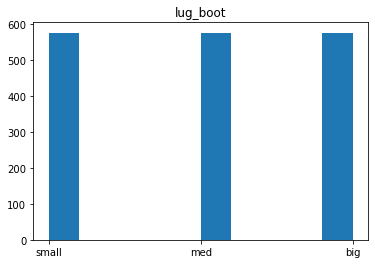

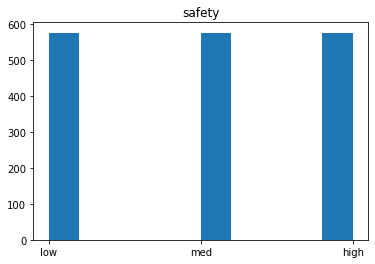

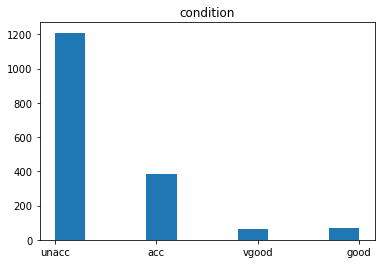

In [58]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [59]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [87]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

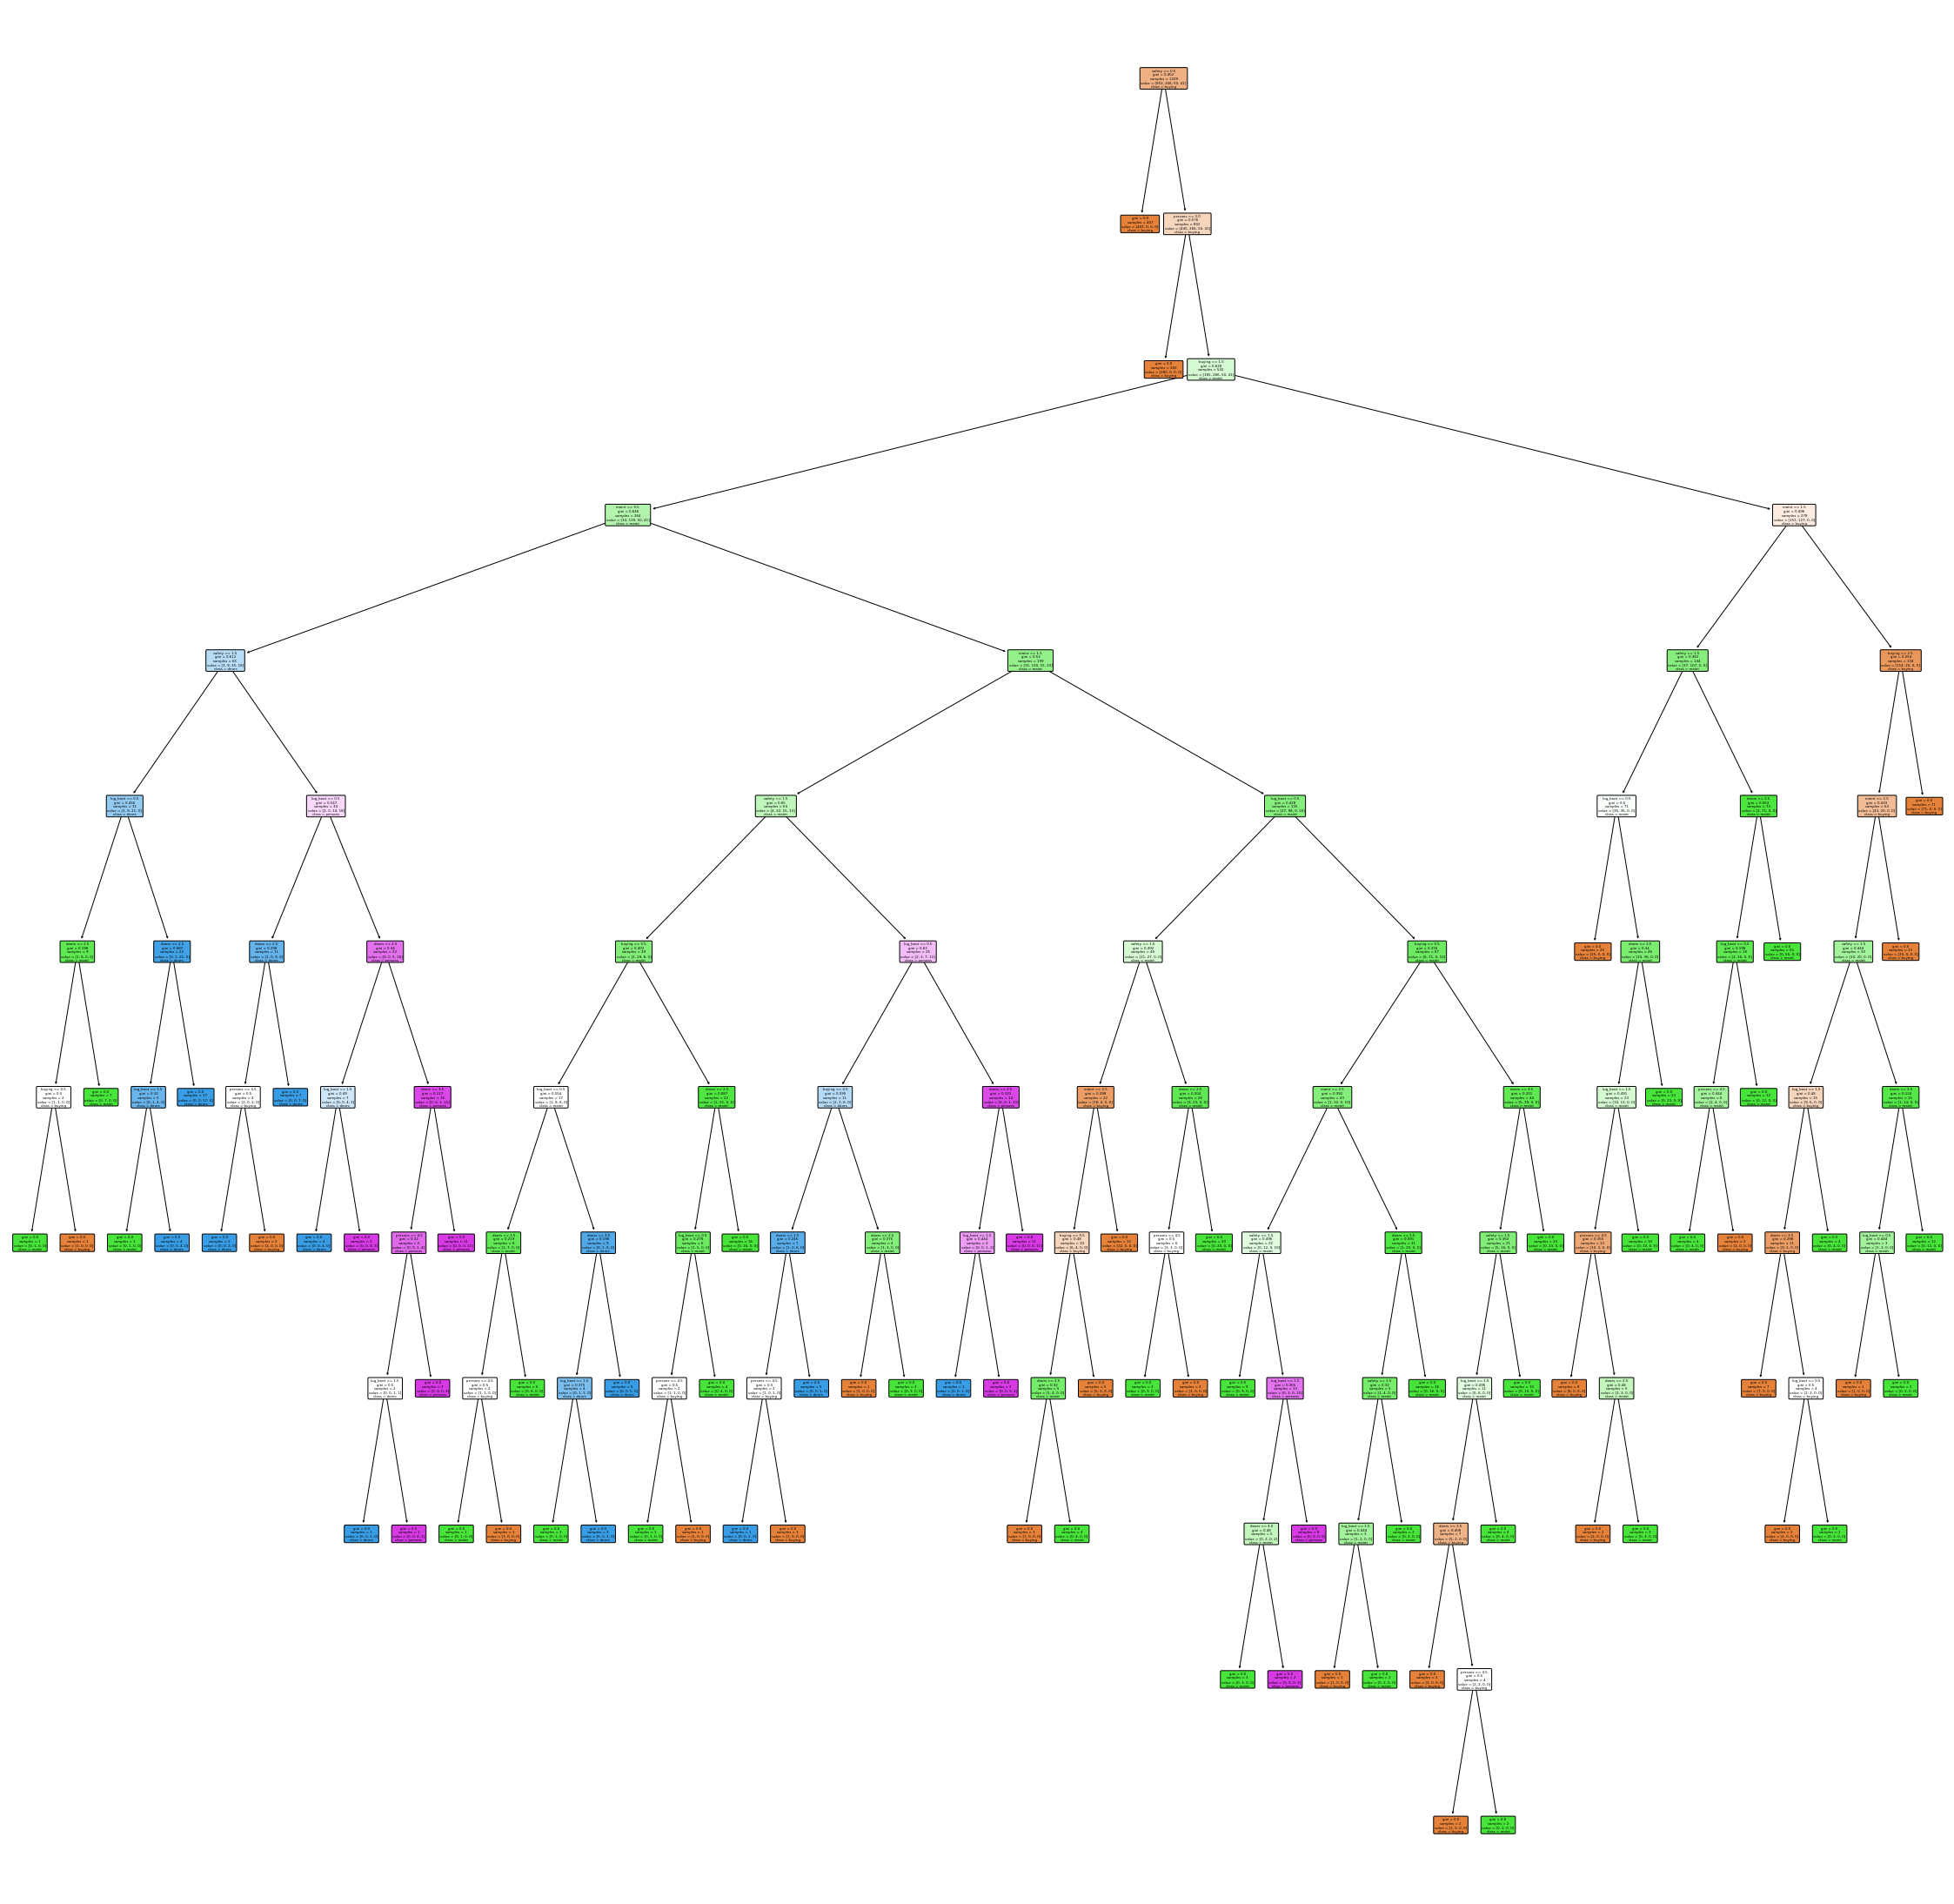

In [91]:

from sklearn.tree import plot_tree
plt.figure(figsize=(40, 40))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=["buying", "maint", "doors", "persons", "lug_boot", "safety"],
         feature_names=X.columns)
plt.show()

In [94]:
predictions = dt_clf.predict(X_test)
(y_test==predictions).sum()/len(y_test)

0.9672447013487476

In [95]:
from sklearn.metrics import plot_confusion_matrix

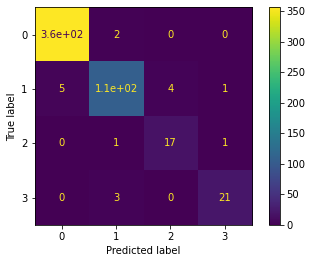

In [97]:
plot_confusion_matrix(dt_clf, X_test, y_test)